## INTRODUCTION

In the world of Pokémon academia, one name towers above any other – Professor Samuel Oak. While his colleague Professor Elm specializes in Pokémon evolution, Oak has dedicated his career to understanding the relationship between Pokémon and their human trainers. A former trainer himself, the professor has first-hand experience of how obstinate Pokémon can be – particularly when they hold legendary status.

For his latest research project, Professor Oak has decided to investigate the defining characteristics of legendary Pokémon to improve our understanding of their temperament. Hearing of our expertise in classification problems, he has enlisted us as the lead researchers.

Our journey begins at the professor's research lab in Pallet Town, Kanto. The first step is to open up the Pokédex, an encyclopaedic guide to 801 Pokémon from all seven generations.

These are the variables in the Pokemon dataset (pokedex.csv):

* pokedex_number: The entry number of the Pokemon in the National Pokedex
* name: The English name of the Pokemon
* attack: The Base Attack of the Pokemon
* defense: The Base Defense of the Pokemon
* height_m: Height of the Pokemon in metres
* hp: The Base HP of the Pokemon
* percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.
* sp_attack: The Base Special Attack of the Pokemon
* sp_defense: The Base Special Defense of the Pokemon
* speed: The Base Speed of the Pokemon
* type1: The Primary Type of the Pokemon
* weight_kg: The Weight of the Pokemon in kilograms
* generation: The numbered generation which the Pokemon was first introduced
* is_legendary: Denotes if the Pokemon is legendary.

In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from packaging import version
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


In [2]:
#Loading data
pokemon_df=pd.read_csv("pokedex.csv")
print(pokemon_df.shape)
pokemon_df.head()

(801, 14)


,pokedex_number,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
0,1,Bulbasaur,49,49,0.7,45,88.1,65,65,45,grass,6.9,1,0
1,2,Ivysaur,62,63,1.0,60,88.1,80,80,60,grass,13.0,1,0
2,3,Venusaur,100,123,2.0,80,88.1,122,120,80,grass,100.0,1,0
3,4,Charmander,52,43,0.6,39,88.1,60,50,65,fire,8.5,1,0
4,5,Charmeleon,64,58,1.1,58,88.1,80,65,80,fire,19.0,1,0


In [3]:
#Lets see how many nulls do we have
pokemon_df.isna().sum()

pokedex_number      0
name                0
attack              0
defense             0
height_m           20
hp                  0
percentage_male    98
sp_attack           0
sp_defense          0
speed               0
type                0
weight_kg          20
generation          0
is_legendary        0
dtype: int64

In [4]:
#Filling missing values
pokemon_df['height_m'].fillna(pokemon_df['height_m'].median(),inplace=True )
pokemon_df['weight_kg'].fillna(pokemon_df['weight_kg'].median(),inplace=True )
pokemon_df['percentage_male'].fillna('None',inplace=True)
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pokedex_number   801 non-null    int64  
 1   name             801 non-null    object 
 2   attack           801 non-null    int64  
 3   defense          801 non-null    int64  
 4   height_m         801 non-null    float64
 5   hp               801 non-null    int64  
 6   percentage_male  801 non-null    object 
 7   sp_attack        801 non-null    int64  
 8   sp_defense       801 non-null    int64  
 9   speed            801 non-null    int64  
 10  type             801 non-null    object 
 11  weight_kg        801 non-null    float64
 12  generation       801 non-null    int64  
 13  is_legendary     801 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 87.7+ KB


C:\Users\admin\AppData\Local\Temp\ipykernel_7724\2201275870.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  pokemon_df['percentage_male'].fillna('None',inplace=True)


## ¿How many pokemons are Legendary?
 
After taking a look in our data, we can see that there are some variables that could explain what makes a pokemon legendary. Whithin the pokemon's background, we know that the  fighter's numerical  stats, such as health points, attack or defense, as well as type (dragon, fire, etc...), are strong reasons that make a pokemon legendary. 

In [5]:
leg=pokemon_df['is_legendary'].sum()
print('There are', leg, 'legendary pokemons')

There are 70 legendary pokemons


In [6]:
# 1 shows the number of pokemons that are legendary while 0 shows the non legendary pokemons. 
print(70/801)
pokemon_df['is_legendary'].value_counts()
#Only 9% of the population are legendary

0.08739076154806492


is_legendary
0    731
1     70
Name: count, dtype: int64

In [7]:
#Let's see what pokemons are legendary in our dataframe
pokemon_df.query("is_legendary == True")

,pokedex_number,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
143,144,Articuno,85,100,1.7,90,None,95,125,85,ice,55.4,1,1
144,145,Zapdos,90,85,1.6,90,None,125,90,100,electric,52.6,1,1
145,146,Moltres,100,90,2.0,90,None,125,85,90,fire,60.0,1,1
149,150,Mewtwo,150,70,2.0,106,None,194,120,140,psychic,122.0,1,1
150,151,Mew,100,100,0.4,100,None,100,100,100,psychic,4.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,797,Celesteela,101,103,9.2,97,None,107,101,61,steel,999.9,7,1
797,798,Kartana,181,131,0.3,59,None,59,31,109,grass,0.1,7,1
798,799,Guzzlord,101,53,5.5,223,None,97,53,43,dark,888.0,7,1
799,800,Necrozma,107,101,2.4,97,None,127,89,79,psychic,230.0,7,1


## Legendary pokemon by height and weight

Let's see if there is a relationship between height and weight 

We now know that there are 70 legendary Pokémon – a sizable minority at 9% of the population! Let's start to explore some of their distinguishing characteristics.

First of all, we'll plot the relationship between height_m and weight_kg for all 801 Pokémon, highlighting those that are classified as legendary. We'll also add conditional labels to the plot, which will only print a Pokémon's name if it is taller than 7.5m or heavier than 600kg.

In [8]:
#first we are going to filter and select the pokemons who weight more than 600, as they are the ones we will label
x=pokemon_df[pokemon_df['weight_kg']>600]
x

,pokedex_number,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
382,383,Groudon,180,160,3.5,100,None,150,90,90,ground,950.0,3,1
482,483,Dialga,120,120,5.4,100,None,150,100,90,steel,683.0,4,1
486,487,Giratina,120,100,4.5,150,None,120,100,90,ghost,750.0,4,1
749,750,Mudsdale,125,100,2.5,100,50.0,55,85,35,ground,920.0,7,0
789,790,Cosmoem,29,131,0.1,43,None,29,131,37,psychic,999.9,7,1
796,797,Celesteela,101,103,9.2,97,None,107,101,61,steel,999.9,7,1
798,799,Guzzlord,101,53,5.5,223,None,97,53,43,dark,888.0,7,1


In [9]:
#the same for those who are higher than 5m.
y=pokemon_df[pokemon_df['height_m']>5]
y

,pokedex_number,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
94,95,Onix,45,160,8.8,35,50.0,30,45,70,rock,210.0,1,0
129,130,Gyarados,155,109,6.5,95,50.0,70,130,81,water,235.0,1,0
207,208,Steelix,125,230,9.2,75,50.0,55,95,30,steel,400.0,2,0
248,249,Lugia,90,130,5.2,106,None,90,154,110,psychic,216.0,2,1
320,321,Wailord,90,45,14.5,170,50.0,90,45,60,water,398.0,3,0
349,350,Milotic,60,79,6.2,95,50.0,100,125,81,water,162.0,3,0
383,384,Rayquaza,180,100,7.0,105,None,180,100,115,dragon,206.5,3,1
482,483,Dialga,120,120,5.4,100,None,150,100,90,steel,683.0,4,1
716,717,Yveltal,131,95,5.8,126,None,131,98,99,dark,203.0,6,1
796,797,Celesteela,101,103,9.2,97,None,107,101,61,steel,999.9,7,1


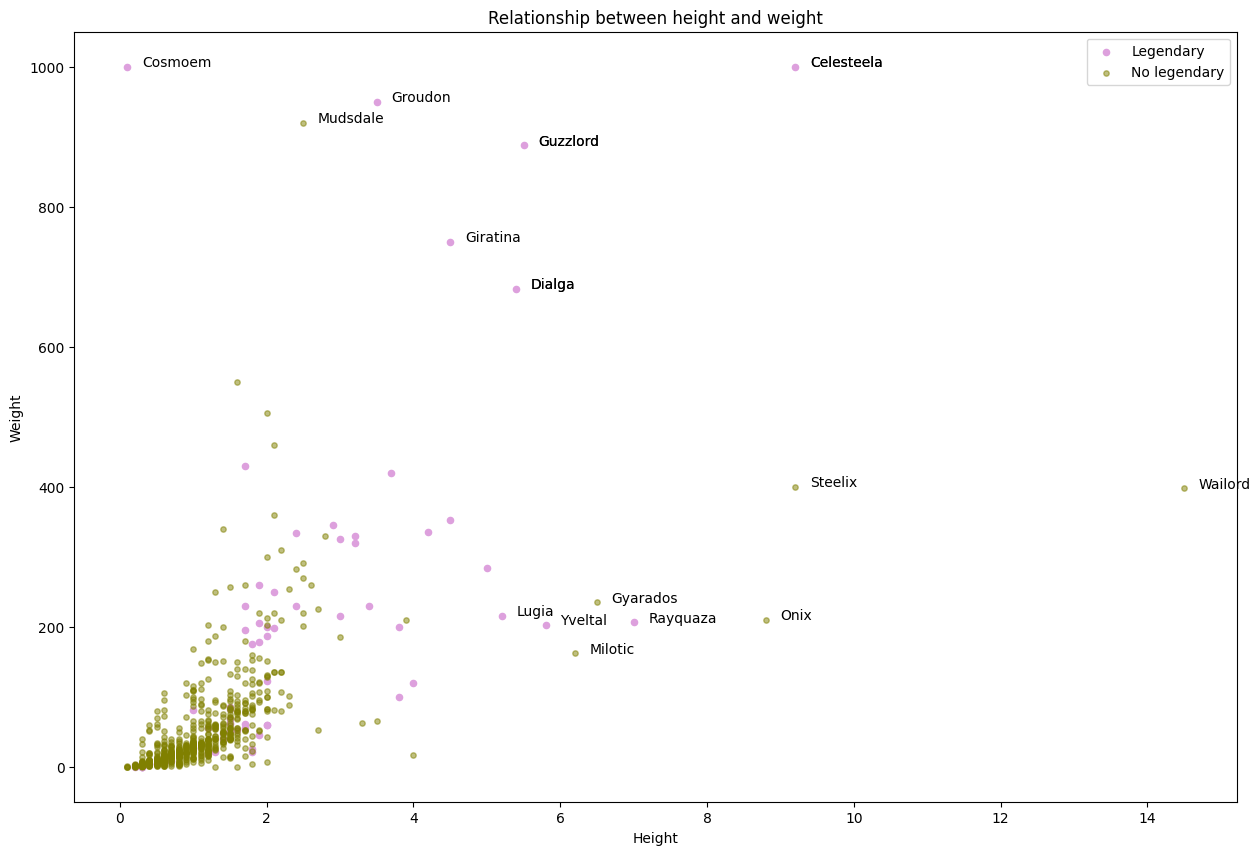

In [10]:
#WE CREATE TWO NEW VARIABLES, ONE THAT CONTAINS THE LEGENDARY POKEMON AND OTHER FOR THE NON LEGENDARY
legendary=pokemon_df[pokemon_df['is_legendary']==True]
nolegendary=pokemon_df[pokemon_df['is_legendary']==False]

#WE STABLISH THE SIZE OF THE FIGURE AND MAKE THE SCATTER PLOT WITH DIFFERENT COLORS AND SIZES TO DISTINGUISH THE
#LEGENDARY AND NON-LEGENDARY POKEMONS
plt.figure(figsize=(15,10))
plt.scatter(legendary['height_m'], legendary['weight_kg'], s=20, color='plum', label = 'Legendary')
plt.scatter(nolegendary['height_m'], nolegendary['weight_kg'], s=15, color='olive', alpha=.5, label='No legendary')

#IN ORDER TO LABEL THE ONES WE HAVE FILTERED ABOVE, WE USE THE plt.text AND AS THIS COMAND NEEDS NUMBERS AS ARGUMENTS
#WE USE IT IN A FOR LOOP THAT GOES OVER x AND y.
for i in range(len(x)):
    plt.text(x['height_m'].iloc[i]+0.2, x['weight_kg'].iloc[i]+0.2, x['name'].iloc[i])

for j in range(len(y)):
    plt.text(y['height_m'].iloc[j]+0.2, y['weight_kg'].iloc[j]+0.2, y['name'].iloc[j] )

#FOR A BETTER PRESENTATION OF THE GRAPGH WE PRINT THE LABELS FOR THE AXES, A TITLE AND THE LEGEND
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Relationship between height and weight")
plt.legend()


## Legendary Pokémon by type
It seems that legendary Pokémon are generally taller and heavier, but with many exceptions. For example, Onix (Gen 1), Steelix (Gen 2) and Wailord (Gen 3) are all extremely tall, but none of them have legendary status. There must be other factors at play.

We will now look at the effect of a Pokémon's type on its legendary/non-legendary classification. There are 18 possible types, ranging from the common (Grass / Normal / Water) to the rare (Fairy / Flying / Ice). We will calculate the proportion of legendary Pokémon within each category, and then plot these proportions using a simple bar chart.

C:\Users\admin\AppData\Local\Temp\ipykernel_4448\1602906013.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=legendary, palette='hsv')


<Axes: xlabel='type', ylabel='count'>

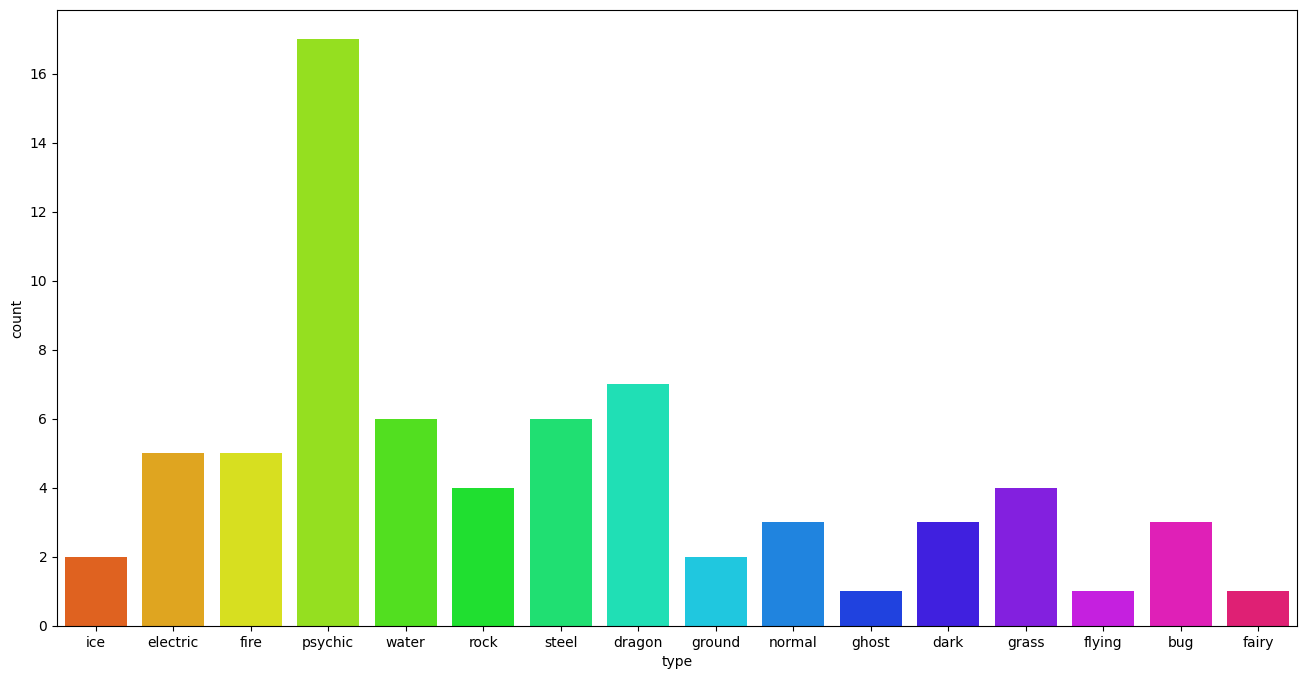

In [11]:
#WE FIRST DO A BAR CHART WITH THE COMAND COUNTPLOT THAT SHOWS US THE NUMBER OF LEGENDARY POKEMONS OF EACH TYPE,
#BECAUSE WE GIVE THE ARGUMENT 'TYPE' TO FILTER BY, AND THE DATA FRAME LEGENDARY THAT ALREADY HAS THE LEGENDARY ONES.
plt.figure(figsize=(16,8))
sns.countplot(x='type', data=legendary, palette='hsv')

<Axes: xlabel='type', ylabel='count'>

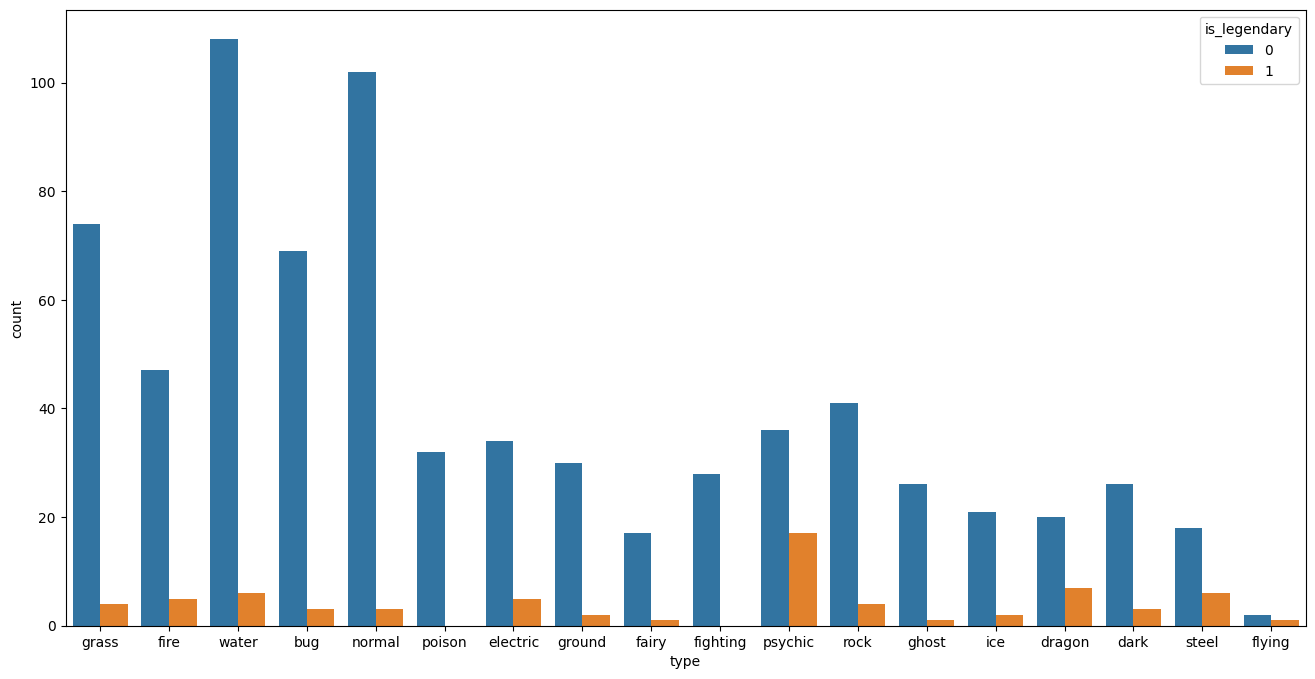

In [12]:
#IN THIS OTHER CHART WE HAVE REPRESENTED BOTH THE LEGENDARY AND NO LEGENDARY POKEMONS BY TYPE...THIS ALREADY GIVES US
#A VISUAL INTUITION THAT FLYING AND PSYCHIC ARE THE ONES THAT HAVE MORE PERCENTAGE OF LEGENDARIES OVER THE TOTAL
plt.figure(figsize=(16,8))
sns.countplot(x='type', data=pokemon_df, hue='is_legendary')

In [13]:
legendary.type.value_counts()

type
psychic     17
dragon       7
water        6
steel        6
electric     5
fire         5
rock         4
grass        4
normal       3
dark         3
bug          3
ice          2
ground       2
ghost        1
flying       1
fairy        1
Name: count, dtype: int64

In [14]:
#BUT AS WE WANT THE PERCENTAGE OF LEGENDARY POKEMONS OVER THE TOTAL NUMBER OF EACH TYPE, WE ARE GOING TO COUNT THE
#NUMBER OF EACH TYPE IN THE TOTAL DATA FRAME AND IN THE ONE THAT ONLY CONTAINS THE LEGENDARY ONES
total_by_tipe=pokemon_df['type'].value_counts()
total_by_tipe

type
water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: count, dtype: int64

In [15]:
legendary_by_type=legendary['type'].value_counts()
legendary_by_type

type
psychic     17
dragon       7
water        6
steel        6
electric     5
fire         5
rock         4
grass        4
normal       3
dark         3
bug          3
ice          2
ground       2
ghost        1
flying       1
fairy        1
Name: count, dtype: int64

#AND NOW WE ARE GOING TO CREATE A DATA FRAME THAT MERGES THIS TWO


In [16]:
by_type=pd.merge(total_by_tipe,legendary_by_type,how='outer',left_index=True,right_index=True)
by_type.columns=['Total','Legendary']
by_type

,Total,Legendary
type,,
bug,72,3.0
dark,29,3.0
dragon,27,7.0
electric,39,5.0
fairy,18,1.0
fighting,28,NaN
fire,52,5.0
flying,3,1.0
ghost,27,1.0


In [17]:

by_type.fillna(0,inplace=True)
by_type

,Total,Legendary
type,,
bug,72,3.0
dark,29,3.0
dragon,27,7.0
electric,39,5.0
fairy,18,1.0
fighting,28,0.0
fire,52,5.0
flying,3,1.0
ghost,27,1.0


In [18]:
#AND LETS CREATE A NEW COLUMN TO THIS DATA FRAME THAT DIVIDES THE LEGENDARY ONES BY THE TOTAL IN ORDER TO GET THE
#PERCENTAGE
by_type['Percentage']=by_type['Legendary']/by_type['Total']*100
by_type

,Total,Legendary,Percentage
type,,,
bug,72,3.0,4.166667
dark,29,3.0,10.344828
dragon,27,7.0,25.925926
electric,39,5.0,12.820513
fairy,18,1.0,5.555556
fighting,28,0.0,0.000000
fire,52,5.0,9.615385
flying,3,1.0,33.333333
ghost,27,1.0,3.703704


In [19]:
by_type=by_type.sort_values(by=['Percentage'])
by_type

,Total,Legendary,Percentage
type,,,
poison,32,0.0,0.000000
fighting,28,0.0,0.000000
normal,105,3.0,2.857143
ghost,27,1.0,3.703704
bug,72,3.0,4.166667
grass,78,4.0,5.128205
water,114,6.0,5.263158
fairy,18,1.0,5.555556
ground,32,2.0,6.250000


C:\Users\admin\AppData\Local\Temp\ipykernel_4448\2799289237.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=by_type['Percentage'],y=by_type.index, orient='h', palette='terrain_r')


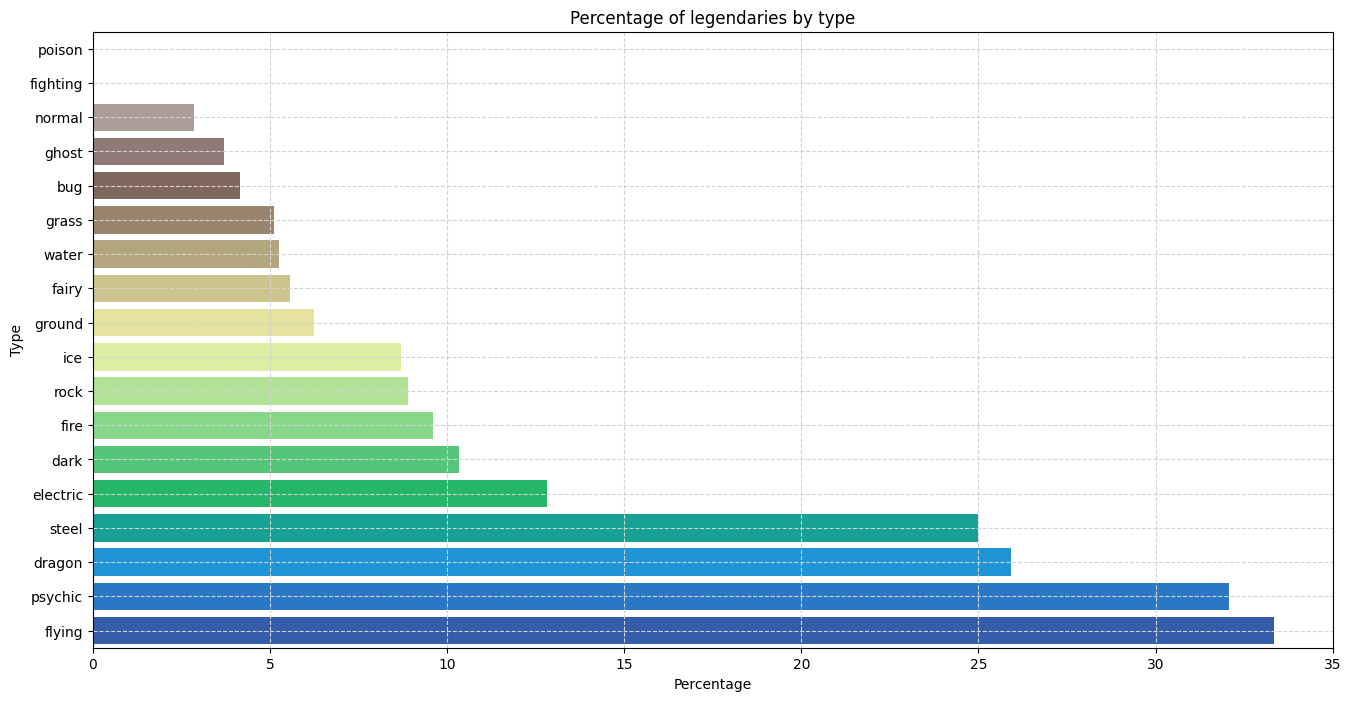

In [20]:
#NOW WE PLOT THE BAR CHART WITH THE PERCENTAGES
#FOR THE x AXIS WE USE THE COLUMN PERCENTAGE AND FOR THE y AXIS WE USE THE INDEX OF THE by_type DATAFRAME THAT ARE THE NAMES
#AND WE SET HORIZONTAL ORIENTATION TO OUR BAR PLOT
plt.figure(figsize=(16,8))

sns.barplot(x=by_type['Percentage'],y=by_type.index, orient='h', palette='terrain_r')

plt.title("Percentage of legendaries by type")
plt.ylabel("Type")
plt.xlabel("Percentage")
plt.grid(color='lightgray', linestyle='--')
plt.show()

## Legendary pokemon by fighter stats

C:\Users\admin\AppData\Local\Temp\ipykernel_4448\561378600.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pokemon_df['is_legendary'],y=pokemon_df['attack'], palette='Blues')
C:\Users\admin\AppData\Local\Temp\ipykernel_4448\561378600.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pokemon_df['is_legendary'],y=pokemon_df['defense'], palette='Greens')
C:\Users\admin\AppData\Local\Temp\ipykernel_4448\561378600.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pokemon_df['is_legendary'],y=pokemon_df['sp_attack'], palette='Purple

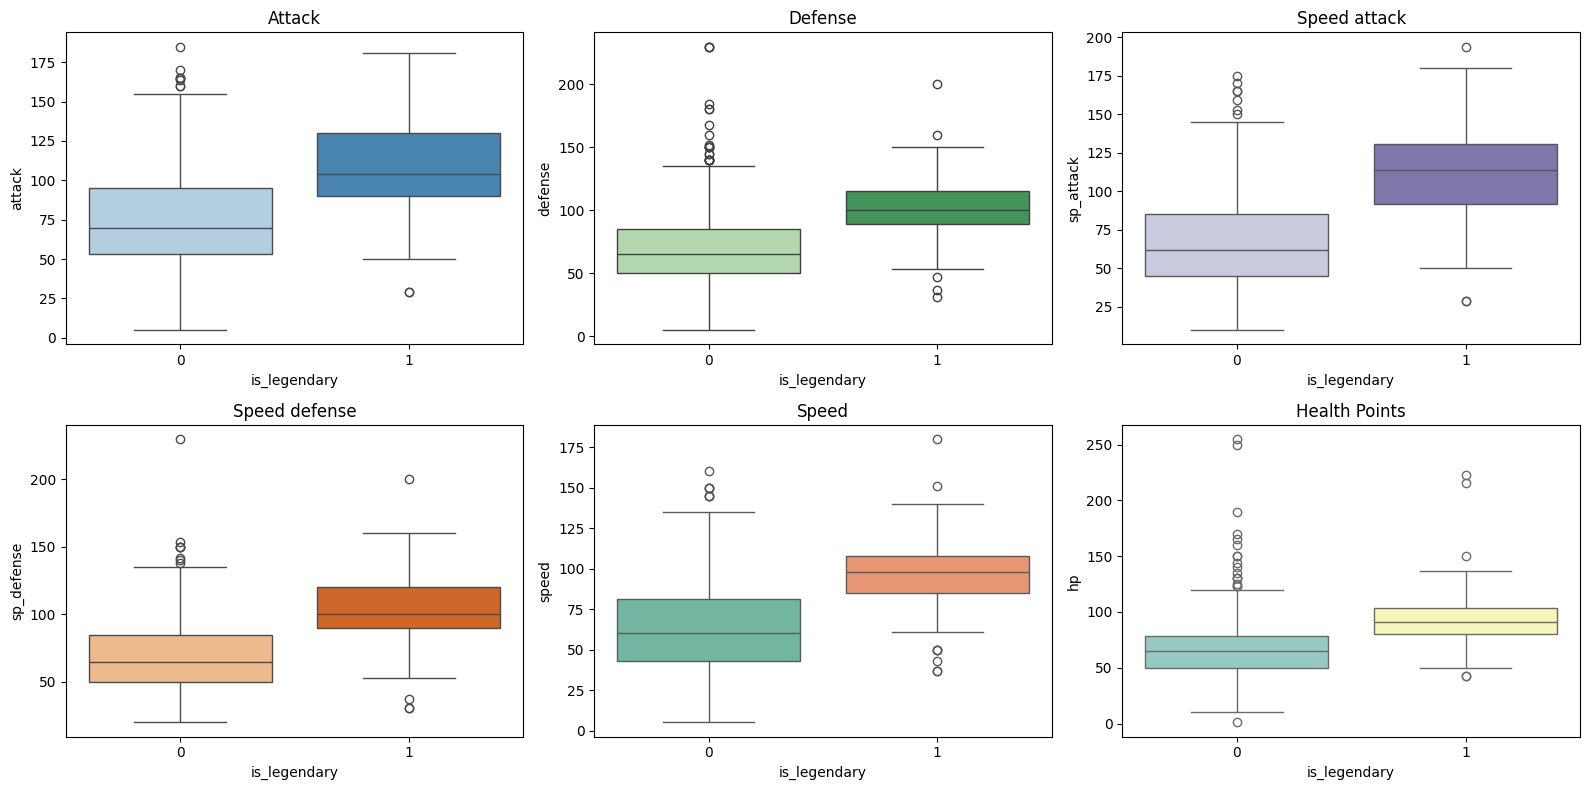

In [21]:
#NOW WE ARE GOING TO CREATE A BOXPLOT FOR EACH CHARACTERISTIC DISTINGUISHING THE LEGENDARY FROM THE NON LEGENDARY

plt.figure(figsize=(16,8))

plt.subplot(2,3,1)
sns.boxplot(x=pokemon_df['is_legendary'],y=pokemon_df['attack'], palette='Blues')
plt.title('Attack')

plt.subplot(2,3,2)
sns.boxplot(x=pokemon_df['is_legendary'],y=pokemon_df['defense'], palette='Greens')
plt.title('Defense')

plt.subplot(2,3,3)
sns.boxplot(x=pokemon_df['is_legendary'],y=pokemon_df['sp_attack'], palette='Purples')
plt.title('Speed attack')

plt.subplot(2,3,4)
sns.boxplot(x=pokemon_df['is_legendary'],y=pokemon_df['sp_defense'], palette='Oranges')
plt.title('Speed defense')

plt.subplot(2,3,5)
sns.boxplot(x=pokemon_df['is_legendary'],y=pokemon_df['speed'], palette='Set2')
plt.title('Speed')

plt.subplot(2,3,6)
sns.boxplot(x=pokemon_df['is_legendary'],y=pokemon_df['hp'], palette='Set3')
plt.title('Health Points')

plt.tight_layout()

In [22]:
types = ['attack' , 'defense' , 'height_m' , 'hp' , 'sp_attack' , 'sp_defense' , 'speed' , 'weight_kg']
#WE CREATE A NEW DATAFRAME THAT CONTAINS ONLY THE COLUMNS OF TYPES THAT IS GOING TO BE OUR X VARIABLE AND THE y VARIABLE IS THE COLUMN 'is_legendary'

X = pokemon_df[types]
y = pokemon_df['is_legendary']
#AS WE ARE WORKING WITH CATEGORICAL DATA WE HAVE TO DO SOME PREVIOUS WORK...
#WE CREATE AS MANY NEW COLUMNS AS NUMBER OF POKEMON TYPES WE HAVE, SO NOW IF WE HAVE A GRASS POKEMON IT WILL TAKE THE VALUE 1 IN THE NEW COLUMN 'Grass'
#AND 0 FOR THE REST OF NEW COLUMNS.

#FIRST WE CREATE THE ENCODER
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()


#WE CREATE THE ARRAY OF 0's AND 1's, AND WITH THIS CODE WE ARE ALREADY DELETING THE COLUMN TYPE
types_values = encoder.fit_transform(pokemon_df[['type']]).toarray()
#WE ASSIGN THE NAME OF EACH TYPE TO THE COLUMNS
types_names = encoder.categories_[0]

#NOW WE ADD TO OUR DATA FRAME X THESE NEW COLUMNS WE HAVE CREATED
X[types_names]= types_values

#AND TO OUR PREVIOUS LIST types THE NAMES OF THESE COLUMNS
types = types + list(types_names)

#NOW WE ARE READY TO SPLIT THE DATA SET AS WE ARE ASKED TO...80% FOR TRAINING AND 20% FOR TESTING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1812)

C:\Users\admin\AppData\Local\Temp\ipykernel_4448\2389299226.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[types_names]= types_values
C:\Users\admin\AppData\Local\Temp\ipykernel_4448\2389299226.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[types_names]= types_values
C:\Users\admin\AppData\Local\Temp\ipykernel_4448\2389299226.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [23]:
#IMPORT PACKAGES.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

#FIRST WE CREATE AN OBJECT WITH THE TREE CLASSIFIER THAT IS THE MODEL WE WANT TO FIT, SO WE CAN AFTERWARDS APPLY IT TO OUR DATA
tree_clf = DecisionTreeClassifier(max_depth=3 , random_state=27)

#WE FIT THE MODEL IN THE TRAINING SET WE HAVE ALREADY CREATED: X_train, y_train, FOR THAT WE USE THE COMMAND: .fit
tree_clf.fit(X_train, y_train)

#NOW LETS PREDICT WHICH WILL BE THE RESPONSE FOR THE TEST SET WE HAVE CREATED
predictions = tree_clf.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
X_test.head(1)

,attack,defense,height_m,hp,sp_attack,sp_defense,speed,weight_kg,bug,dark,...,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
615,40,85,0.4,50,40,65,25,7.7,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
pokemon_df.iloc[614, pokemon_df.columns.get_loc('is_legendary')]

0

In [26]:
# HOW GOOD IS OUR CLASSIFIER? TO SEE THIS WE HAVE TO LOOK FOR THE MODEL ACCURACY, THAT TELLS US HOW OFTEN THE CLASSIFIER IS CORRECT
tree_acc = accuracy_score(y_test, predictions)
print("The accuracy of this model is:", tree_acc)

The accuracy of this model is: 0.906832298136646


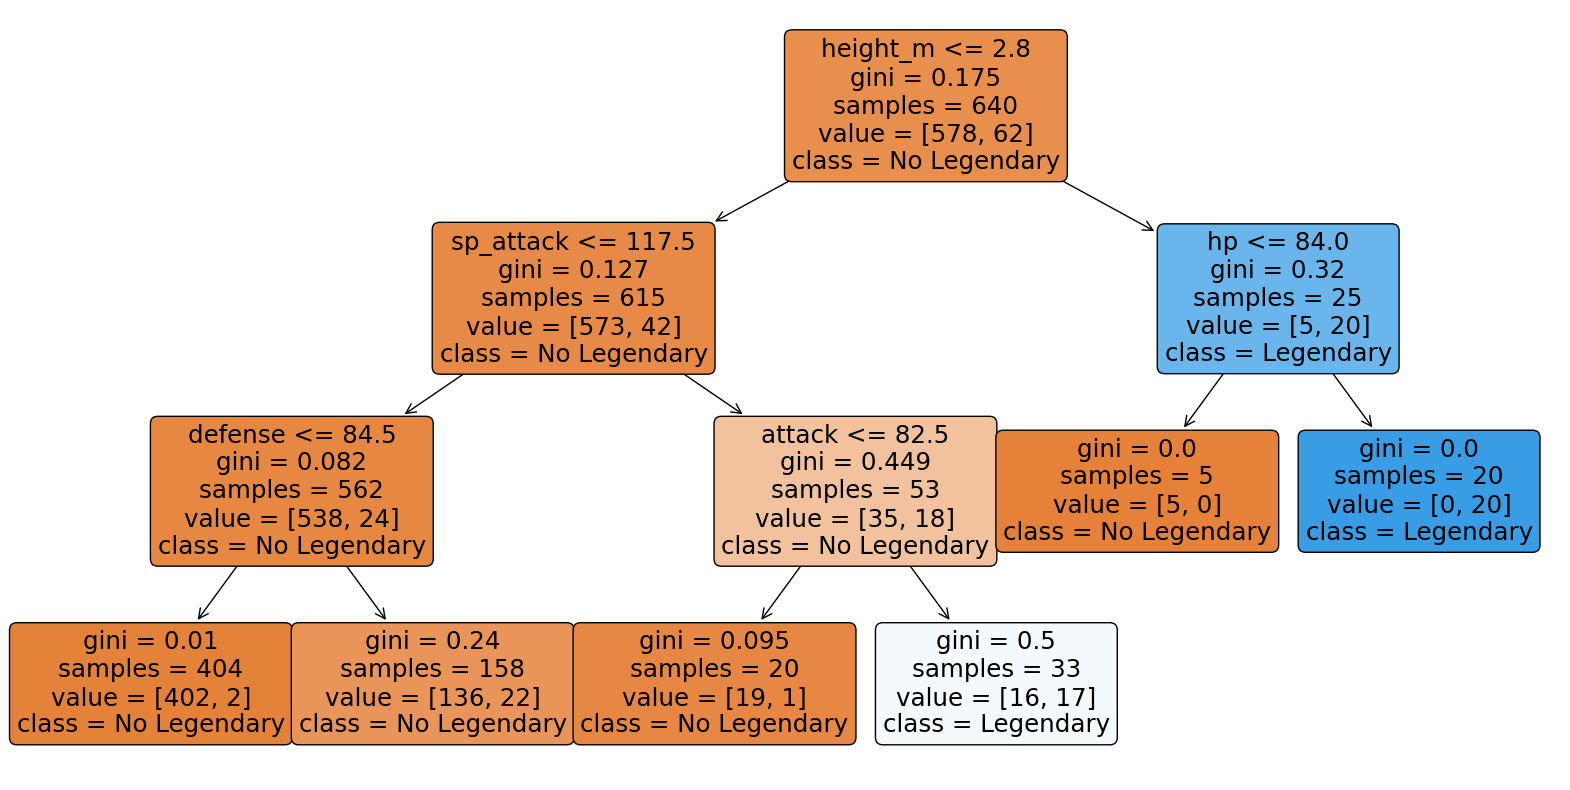

In [29]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

# Dibujar el árbol usando matplotlib
tree.plot_tree(tree_clf, 
               feature_names=X.columns, 
               class_names=['No Legendary', 'Legendary'], 
               filled=True, 
               rounded=True)

# Mostrar el gráfico
plt.show()

In [30]:

from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance with 25 trees, a maximum depth of 3, and a fixed random state for reproducibility
rnd_forest_clf = RandomForestClassifier(n_estimators=25, max_depth=3, random_state=1812)

# Fit the random forest classifier on the training data (X_train and y_train)
rnd_forest_clf.fit(X_train, y_train)

# Predict the class labels for the test data (X_test)
predictions_rf = rnd_forest_clf.predict(X_test)

In [31]:
rf_acc=accuracy_score(y_test,predictions_rf)

print("The accuracy of this model is:", rf_acc)

The accuracy of this model is: 0.937888198757764


In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

from sklearn.model_selection import cross_val_predict

# Perform cross-validation and generate predictions for the training set using the decision tree classifier
# 'cv=3' indicates 3-fold cross-validation
y_train_pred_tree = cross_val_predict(tree_clf, X_train, y_train, cv=3)

# Compute the confusion matrix to evaluate the accuracy of the classification
cm1 = confusion_matrix(y_train, y_train_pred_tree)

# Display the confusion matrix
cm1

array([[570,   8],
       [ 38,  24]], dtype=int64)

In [33]:
y_train_pred_forest=cross_val_predict(rnd_forest_clf,X_train,y_train, cv=3)

cm2=confusion_matrix(y_train,y_train_pred_forest)
cm2

array([[577,   1],
       [ 43,  19]], dtype=int64)

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score
#LETS FIND OUT THE PRECISION OF THE TREE CLASSIFYER
precision_score(y_train, y_train_pred_tree)

0.75

In [35]:
#LETS FIND OUT THE PRECISION OF THE RANDOM FOREST

precision_score(y_train, y_train_pred_forest)

0.95

In [36]:
#LETS FIND OUT THE RECALL OF THE TREE CLF

recall_score(y_train, y_train_pred_tree)

0.3870967741935484

In [37]:
#LETS FIND OUT THE RECALL OF THE RANDOM FOREST

recall_score(y_train, y_train_pred_forest)

0.3064516129032258

In [38]:
#LETS FIND OUT THE F1 SCORE  OF THE TREE CLF

f1_score(y_train, y_train_pred_tree)

0.5106382978723403

In [39]:
f1_score(y_train, y_train_pred_forest)

0.4634146341463415

roc_auc_score for Tree Classifier:  0.6074346405228758
roc_auc_score for Random Forest:  0.9411764705882352


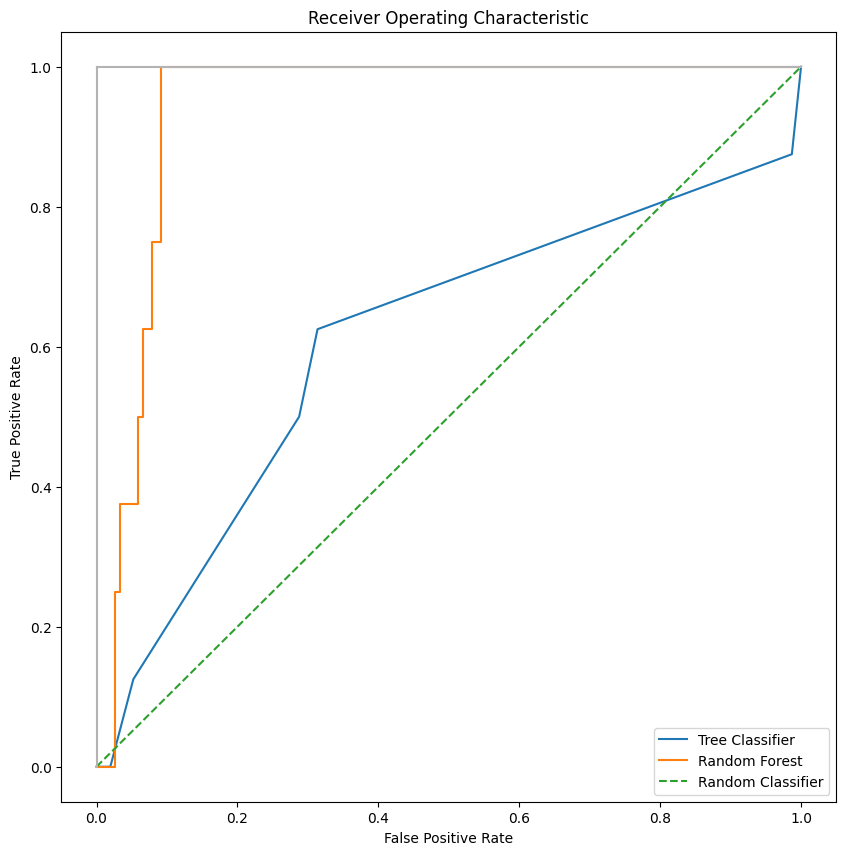

In [40]:
from sklearn.metrics import auc , roc_curve , confusion_matrix
y_score_1_tree = tree_clf.predict_proba(X_test)[:,1]
y_score_2_forest = rnd_forest_clf.predict_proba(X_test)[:,1]


false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score_1_tree)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score_2_forest)

print('roc_auc_score for Tree Classifier: ', roc_auc_score(y_test, y_score_1_tree))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score_2_forest))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1, label ='Tree Classifier')
plt.plot(false_positive_rate2, true_positive_rate2, label = 'Random Forest')
plt.plot([0, 1], ls="--", label ='Random Classifier')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

It's clear from the ROC curves that the RANDOM FOREST is a substantially better model, boasting an AUC of 94.12% versus the TREE CLASSIFIER's 60.74%. When calculating variable importance, it makes sense to do so with the best model available, so we'll use the RANDOM FOREST for the final part of our analysis.

attack has an importance of  6 %
defense has an importance of  8 %
height_m has an importance of  26 %
hp has an importance of  4 %
sp_attack has an importance of  18 %
sp_defense has an importance of  12 %
speed has an importance of  9 %
weight_kg has an importance of  13 %
bug has an importance of  0 %
dark has an importance of  0 %
dragon has an importance of  0 %
electric has an importance of  0 %
fairy has an importance of  0 %
fighting has an importance of  0 %
fire has an importance of  0 %
flying has an importance of  0 %
ghost has an importance of  0 %
grass has an importance of  0 %
ground has an importance of  0 %
ice has an importance of  0 %
normal has an importance of  0 %
poison has an importance of  0 %
psychic has an importance of  2 %
rock has an importance of  0 %
steel has an importance of  1 %
water has an importance of  1 %


<Axes: >

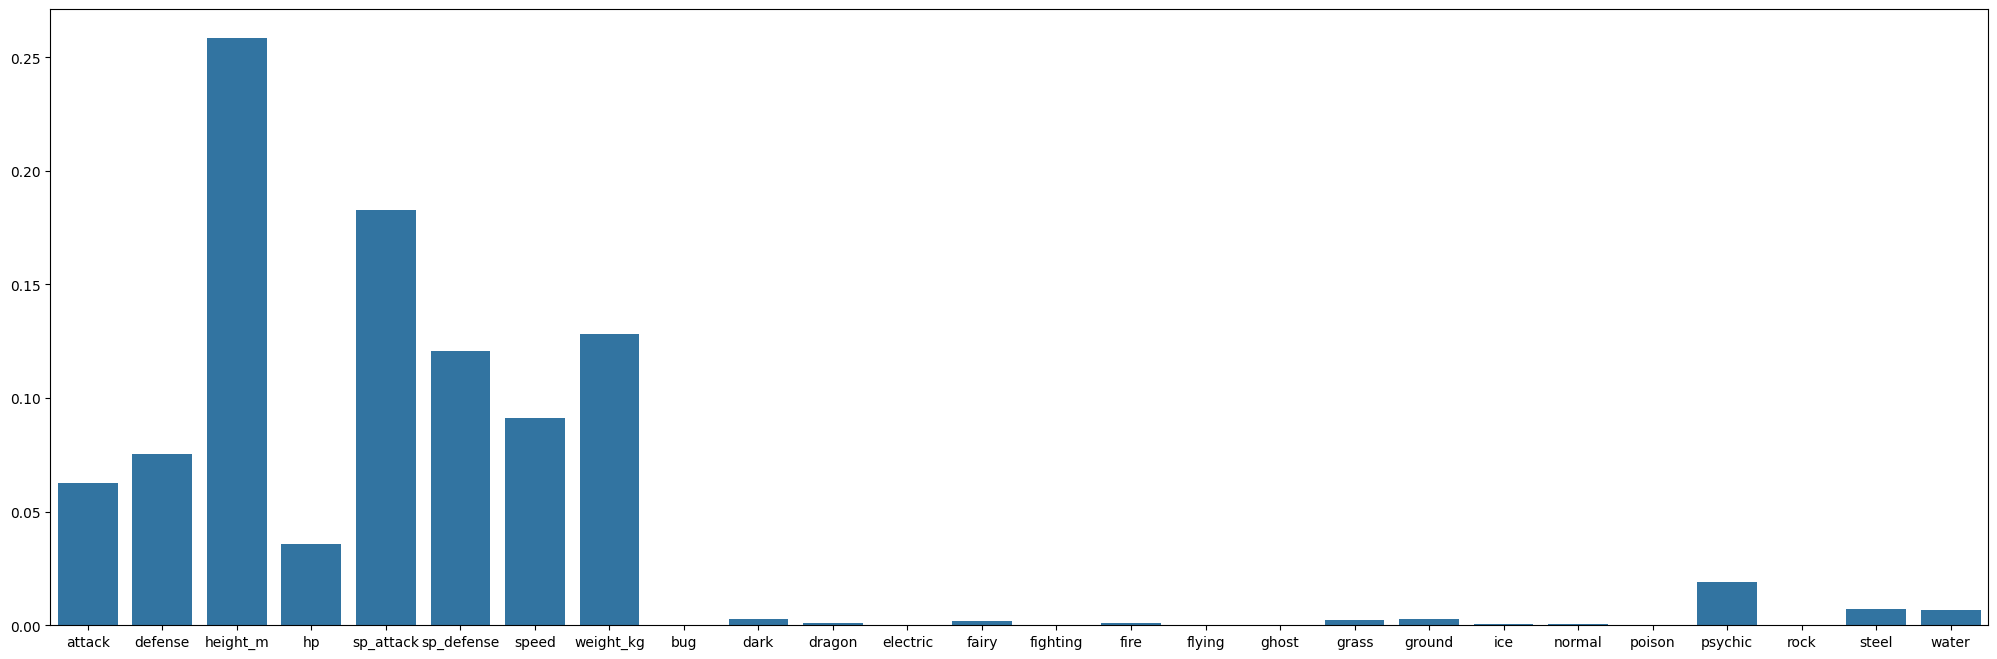

In [41]:
importance=rnd_forest_clf.feature_importances_

for i,v in zip(importance,types):
    print(v, 'has an importance of ', round(i*100.2),'%')

plt.figure(figsize=(25,8))
sns.barplot(x=types,y=importance)

## Conclusions 
We can draw some conclusions from our results on the features of a pokemon:

* Regarding the fighter stats of a pokemon, we found out that in general, legendary pokemons tend to have higher rates of all the analized variables (such as higher base special attack and defense, higher health points...). But we have observed that there are some features more important than others when making this legendary classification. In the decision tree the first separation we can see is between high and small pokemons, giving us a clear intuition that this is an important characteristic. In addition, when fitting the random forest we have looked for the features importance, and as we can observe in the plot of exercise 10, the most important variables are (in descending order): height, speed attack, weight and speed defense, and then speed, attack, defense and health points with a lower rate. The type of pokemon seems not to be as important.

 * Regarding the size of a pokemon, we found out that if a pokemon is heavy and tall, it will have a higher probability of being legendary than short and light pokemons. Fos example, as we have seen in the decision tree we have plotted, if a pokemon is taller than 2.8 meters it is going to be for sure legendary, except if its health points are lower than 84. So higher pokemons are more likely to be legendary than short ones.

* Regarding the pokemon type, we discovered that flying, psychic, dragon and steel will more likely be legendary than other types (such as poison, fighting or normal). Which means that within these groups the proportion of legendary pokemons is higher than in others in which there are more non-legendary ones than legendary.